In [2]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
shutil.copy(r'C:\Users\sthan\Downloads\train.csv',r'C:\Users\sthan\Python\Machine Learning')
shutil.copy(r'C:\Users\sthan\Downloads\sample_submission.csv',r'C:\Users\sthan\Python\Machine Learning')

'C:\\Users\\sthan\\Python\\Machine Learning\\sample_submission.csv'

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sample = pd.read_csv('sample_submission.csv')

In [5]:
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
train.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


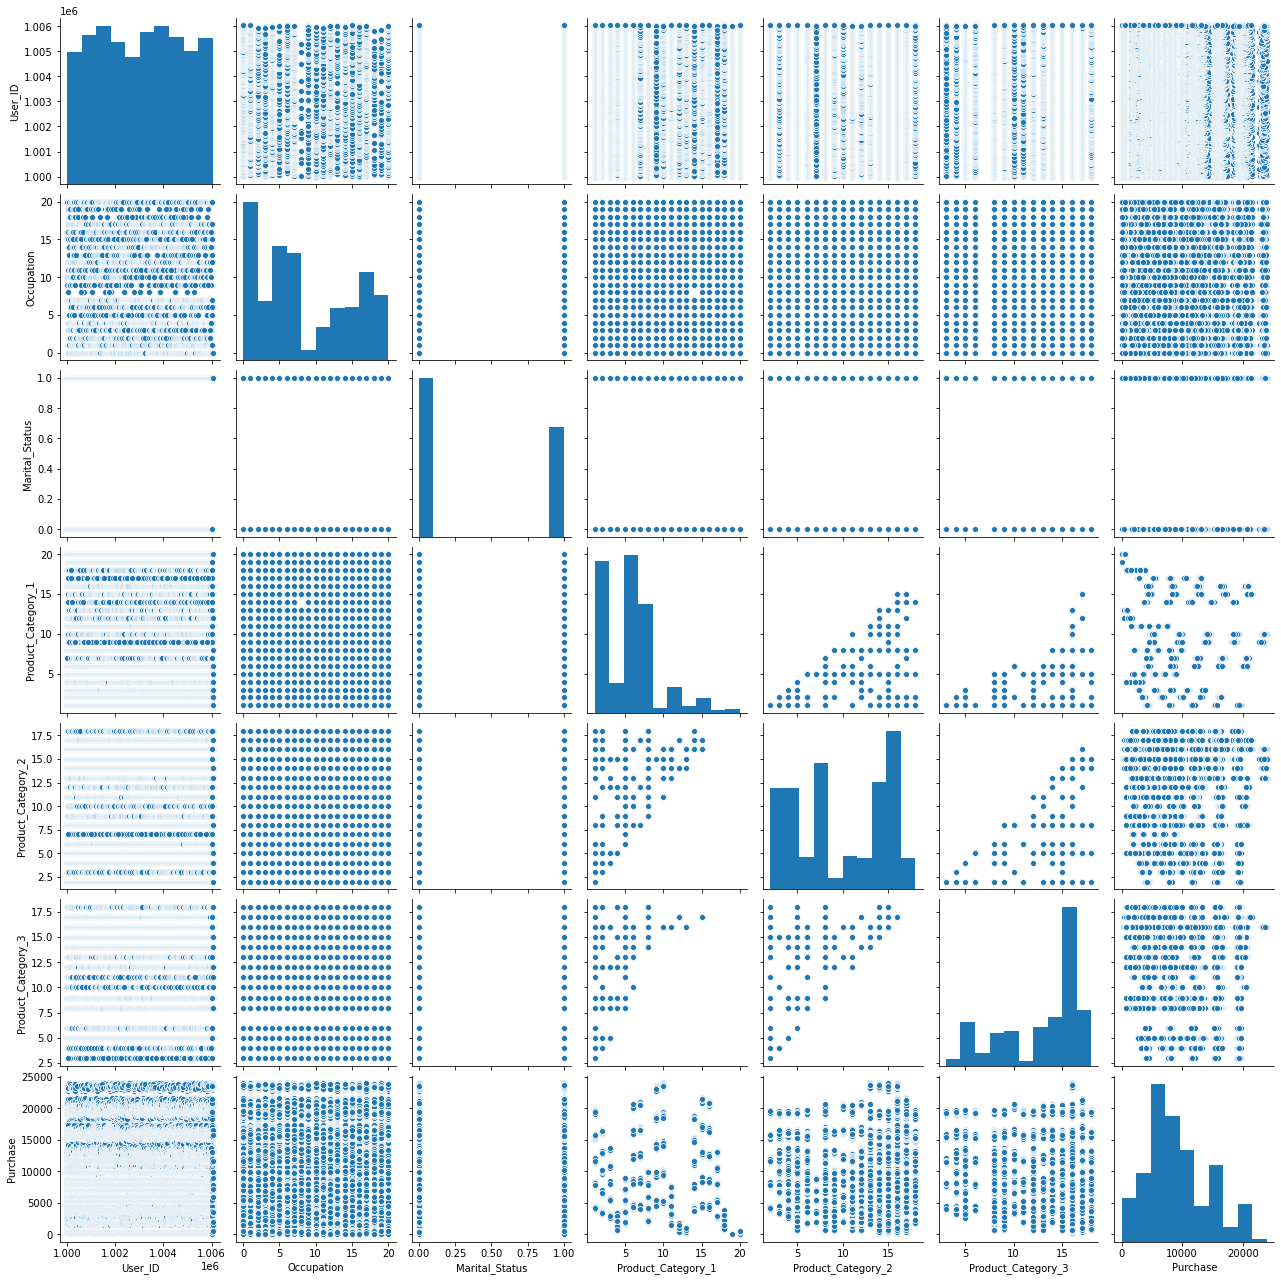

In [10]:
sns.pairplot(train)

In [4]:
test['Source'] = 'test'
train['Source'] = 'train'

In [5]:
df = pd.concat([train, test])

In [6]:
df.shape

(783667, 13)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [8]:
sample.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [13]:
df['Age'].value_counts()

 0    313015
 1    156724
 2    141953
 3     65278
 5     54784
 6     30579
-1     21334
Name: Age, dtype: int64

In [12]:
df['Age'] = df['Age'].replace({'26-35': 0, '36-45': 1, '18-25': 2, '46-50': 3, '51-55': 5, '55+': 6, '0-17': -1 })

In [19]:
df['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [20]:
df['City_Category'].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [16]:
df['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
6    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [15]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({'4+' : 6})

In [24]:
df['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [61]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
df['Product_Category_1'].isnull().sum()

0

In [71]:
df['Product_Category_2'] 

0            0
1          6.0
2            0
3         14.0
4            0
          ... 
233594       0
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: object

In [34]:
df['Product_Category_3'].isnull().sum()

0

In [70]:
df['Product_Category_2'] = df['Product_Category_2'].replace({'nan' : 0})

In [72]:
df['Product_Category_3'] = df['Product_Category_3'].replace({'nan' : 0})

In [ ]:
df['Product'] = 

In [63]:
X = df.select_dtypes(include=np.number).drop(columns=['Purchase','User_ID'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

In [64]:
vif_data

,Feature
0,Occupation
1,Marital_Status
2,Product_Category_1
3,Product_Category_2
4,Product_Category_3


In [65]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [66]:
vif_data

,Feature,VIF
0,Occupation,2.421269
1,Marital_Status,1.667663
2,Product_Category_1,3.309633
3,Product_Category_2,6.331059
4,Product_Category_3,9.553717


In [73]:
df_number_columns = df.select_dtypes(include=np.number).columns
df_category_columns = df.select_dtypes(exclude=np.number).columns

In [74]:
df_category_columns

Index(['Product_ID', 'Gender', 'City_Category', 'Stay_In_Current_City_Years',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Source', 'Product1', 'Product'],
      dtype='object')

In [75]:
df['Age'] = df['Age'].astype(int)


In [76]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [77]:
df['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00285142       1
P00203942       1
P00022042       1
P00056342       1
P00299742       1
Name: Product_ID, Length: 3677, dtype: int64

In [79]:
df['Product_ID_Num'] = df['Product_ID'].apply(lambda x: x[1:] )


In [81]:
df['Product_ID_Num']

0         00069042
1         00248942
2         00087842
3         00085442
4         00285442
            ...   
233594    00118942
233595    00254642
233596    00031842
233597    00124742
233598    00316642
Name: Product_ID_Num, Length: 783667, dtype: object

In [83]:
df['Product_Category_2'] = df['Product_Category_2'].astype(float)

In [78]:
df_number_columns

Index(['User_ID', 'Age', 'Occupation', 'Marital_Status', 'Purchase'], dtype='object')

In [79]:
df_category_columns

Index(['Product_ID', 'Gender', 'City_Category', 'Stay_In_Current_City_Years',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Source', 'Product1', 'Product'],
      dtype='object')

In [84]:
data_to_encode = df[df_category_columns].drop(columns = ['Product_ID', 'Source','Product_Category_2', 'Product_Category_3', 'Product1', 'Product'] )

In [85]:
data_to_encode[:3]

,Gender,City_Category,Stay_In_Current_City_Years,Product_Category_1
0,F,A,2,3
1,F,A,2,1
2,F,A,2,12


In [86]:
data_encoded = pd.get_dummies(data_to_encode)


In [87]:

data_encoded1 = pd.get_dummies(df['Occupation'])

In [119]:
data_encoded1

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
233595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
233596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
233597,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_final = pd.concat([data_encoded, data_encoded1, df[df_number_columns], 
                      df[['Product_ID', 'Source']]], axis = 1)

In [89]:
df_final

,Stay_In_Current_City_Years,Product_Category_1,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,0,1,2,...,18,19,20,User_ID,Age,Occupation,Marital_Status,Purchase,Product_ID,Source
0,2,3,1,0,1,0,0,0,0,0,...,0,0,0,1000001,-1,10,0,8370.0,P00069042,train
1,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1000001,-1,10,0,15200.0,P00248942,train
2,2,12,1,0,1,0,0,0,0,0,...,0,0,0,1000001,-1,10,0,1422.0,P00087842,train
3,2,12,1,0,1,0,0,0,0,0,...,0,0,0,1000001,-1,10,0,1057.0,P00085442,train
4,6,8,0,1,0,0,1,0,0,0,...,0,0,0,1000002,6,16,0,7969.0,P00285442,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,6,8,1,0,0,1,0,0,0,0,...,0,0,0,1006036,0,15,1,NaN,P00118942,test
233595,6,5,1,0,0,1,0,0,0,0,...,0,0,0,1006036,0,15,1,NaN,P00254642,test
233596,6,1,1,0,0,1,0,0,0,0,...,0,0,0,1006036,0,15,1,NaN,P00031842,test
233597,6,10,1,0,0,0,1,0,1,0,...,0,0,0,1006037,3,1,0,NaN,P00124742,test


In [90]:
train_pre  = df_final[df_final['Source'] == 'train']
test_pre  = df_final[df_final['Source'] == 'test']

In [91]:
del train_pre['Source']
del test_pre['Source']

In [92]:
train_pre.columns

Index(['Stay_In_Current_City_Years',         'Product_Category_1',
                         'Gender_F',                   'Gender_M',
                  'City_Category_A',            'City_Category_B',
                  'City_Category_C',                            0,
                                  1,                            2,
                                  3,                            4,
                                  5,                            6,
                                  7,                            8,
                                  9,                           10,
                                 11,                           12,
                                 13,                           14,
                                 15,                           16,
                                 17,                           18,
                                 19,                           20,
                          'User_ID',                        'A

In [94]:
train4_X = train_pre.drop(columns=['Purchase', 'Product_ID',  'User_ID','Occupation','Stay_In_Current_City_Years' ])

In [95]:
test4_X = test_pre.drop(columns=['Purchase', 'Product_ID', 'User_ID','Occupation','Stay_In_Current_City_Years'  ])

In [96]:
train_y = train_pre['Purchase']

In [97]:
lm = LinearRegression()
lm.fit(train4_X, train_y)
pred_train = lm.predict(train4_X)
pred_test = lm.predict(test4_X)
pred_test = abs(pred_test)
print('MAE: ', mean_absolute_error(train_y, pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(train_y, pred_train)))
print('R-squared: ', r2_score(train_y, pred_train))

MAE:  3598.2011861488036
RMSE:  4696.9949607554645
R-squared:  0.12561376179594386


In [142]:
sample

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [143]:
sample['Purchase'] = pred_test

In [144]:
sample.to_csv('BlackFriday_Output.csv')

In [98]:
tree_reg = DecisionTreeRegressor()

In [99]:
tree_reg.fit(train4_X, train_y)
pred_train = tree_reg.predict(train4_X)
pred_test = tree_reg.predict(test4_X)
pred_test = abs(pred_test)
print('MAE: ', mean_absolute_error(train_y, pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(train_y, pred_train)))
print('R-squared: ', r2_score(train_y, pred_train))

MAE:  2159.2322009529234
RMSE:  2899.6034802340064
R-squared:  0.6667728721149614


In [148]:
sample['Purchase'] = pred_test

In [149]:
sample.to_csv('Tree_Output.csv')

In [36]:
df['Product'] = df.Product1.str.cat(df.Product_Category_3)

In [19]:
df['Product_Category_1'] = df['Product_Category_1'].astype(str)

In [20]:
df['Product_Category_2'] = df['Product_Category_2'].astype(str)

In [21]:
df['Product_Category_3'] = df['Product_Category_3'].astype(str)

In [39]:
df['Product_Category_2']

0          nan
1          6.0
2          nan
3         14.0
4          nan
          ... 
233594     nan
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: object